In [235]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyemma
import mdtraj
import scipy.spatial.distance as sdist
import numpy as np
import prody
import itertools

In [236]:
#List simulation files
data=[]
param_files=glob.glob('../Simulations/Epsilon_W_Standardization/*.param')
for param_file in param_files:
    #Add parameters
    with open(param_file) as param:
        values={}
        for line in param:
            if len(line)==0:
                continue
            line=line.strip().split(',')
            key=line[0]
            value=line[1]
            if key=='':
                continue
            values.update({key:value})
            root='.'.join(param_file.split('.')[:-1])
            values.update({'root':root})
    #Add files
    for extension in ['param','cif','pdb','dcd','log']:
        file_name=f'{root}.{extension}'
        if os.path.exists(file_name):
            values.update({extension:file_name})
    data+=[values]
    
simulations=pd.DataFrame(data)
simulations[['epsilon','w1','w2_ratio']]=simulations[['epsilon','w1','w2_ratio']].astype(float)

simulations=simulations.sort_values(['epsilon','w1','w2_ratio'])
simulations=simulations.reindex()
simulations=simulations.reset_index(drop=True)
simulations

,epsilon,root,w1,w2_ratio,aligned,actinLen,disorder,box_size,n_actins,n_abps,...,abp,simulation_platform,test_run,date,name,job_id,param,cif,dcd,log
0,50.0,../Simulations/Epsilon_W_Standardization/S_000...,5.0,0.100,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_14,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...
1,100.0,../Simulations/Epsilon_W_Standardization/S_000...,0.1,0.100,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_11,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...
2,100.0,../Simulations/Epsilon_W_Standardization/S_000...,0.2,0.100,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_11,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...
3,100.0,../Simulations/Epsilon_W_Standardization/S_000...,0.5,0.100,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_11,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...
4,100.0,../Simulations/Epsilon_W_Standardization/S_000...,1.0,0.100,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_11,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...
5,100.0,../Simulations/Epsilon_W_Standardization/S_000...,1.0,0.500,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_11,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...
6,100.0,../Simulations/Epsilon_W_Standardization/S_000...,2.0,0.100,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_11,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...
7,100.0,../Simulations/Epsilon_W_Standardization/S_000...,2.0,0.500,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_11,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...
8,100.0,../Simulations/Epsilon_W_Standardization/S_000...,5.0,0.100,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_14,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...
9,100.0,../Simulations/Epsilon_W_Standardization/S_000...,5.0,0.500,False,100,0,5000,10,100,...,FAS,CUDA,True,2022_04_11,Simulations/Epsilon_W_Standardization/S_000_e_...,0,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...,../Simulations/Epsilon_W_Standardization/S_000...


@> 10480 atoms and 1 coordinate set(s) were parsed in 0.20s.
/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.17s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.11s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.10s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.11s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.10s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 10480 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 10480 atoms and 1 coordinate set(s) wer

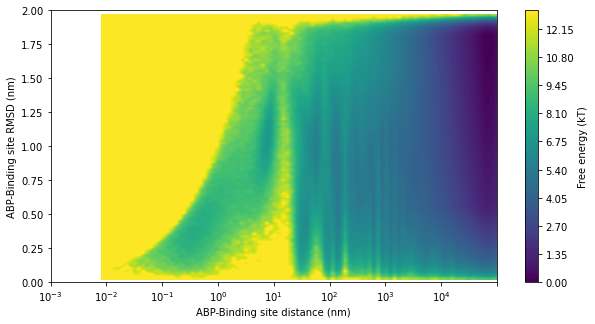

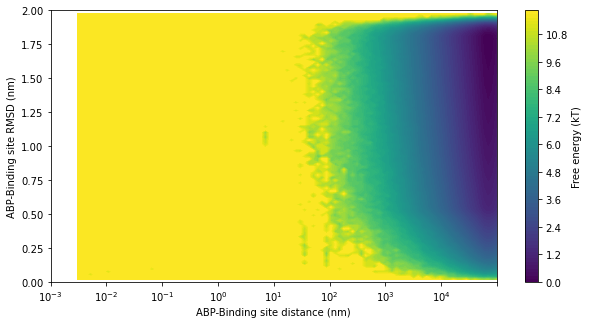

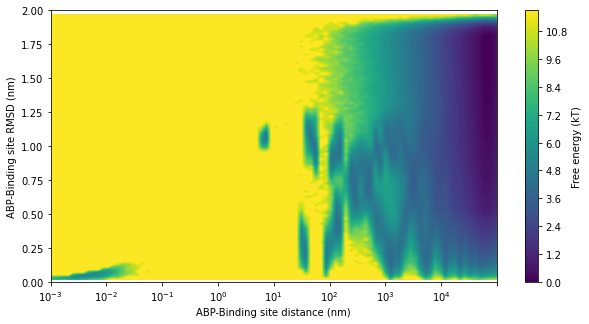

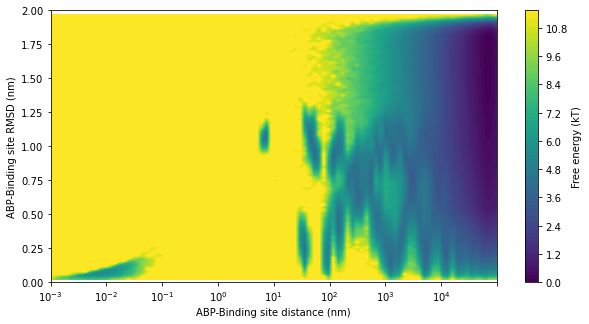

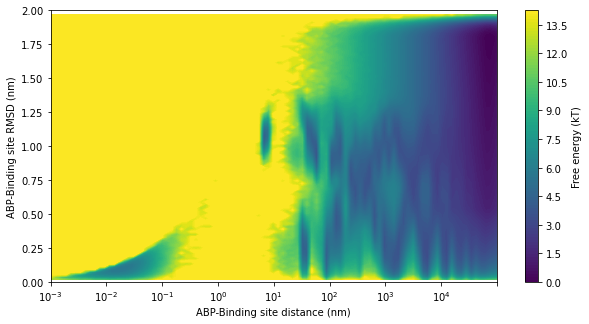

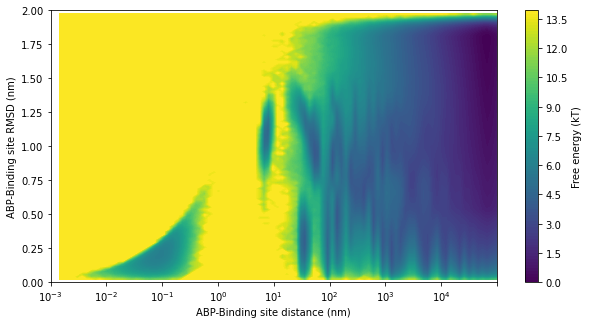

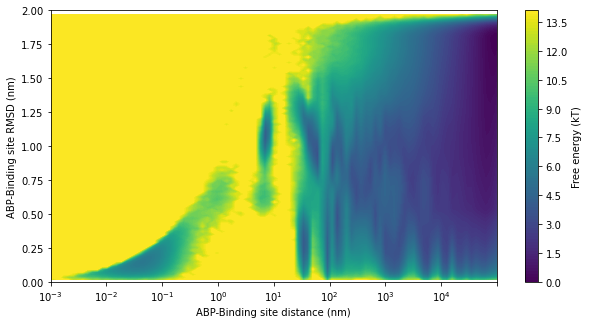

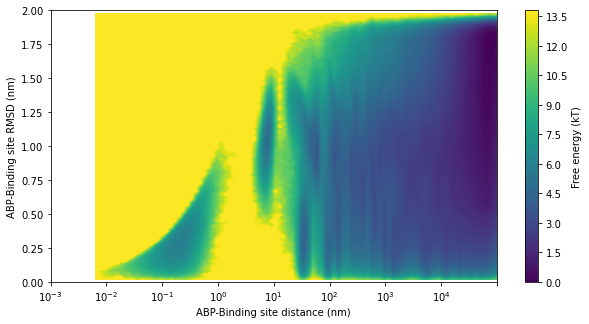

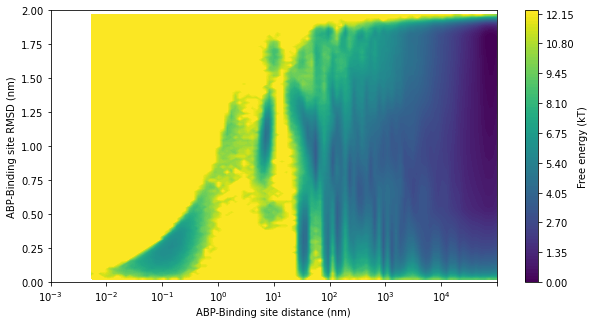

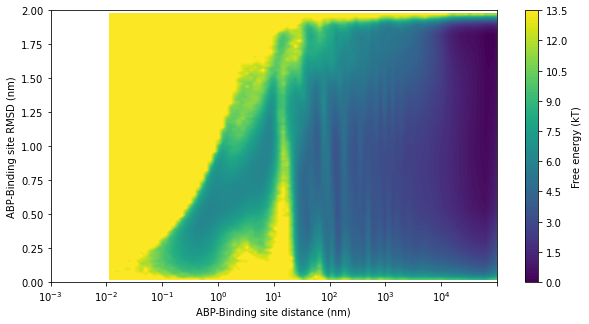

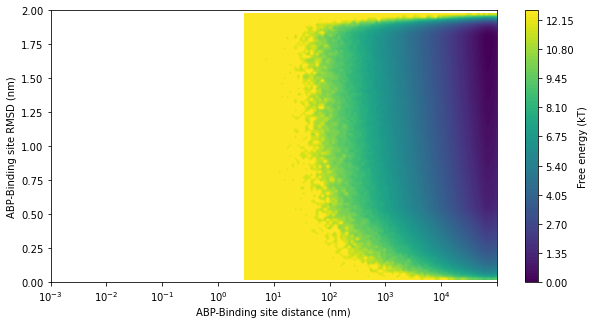

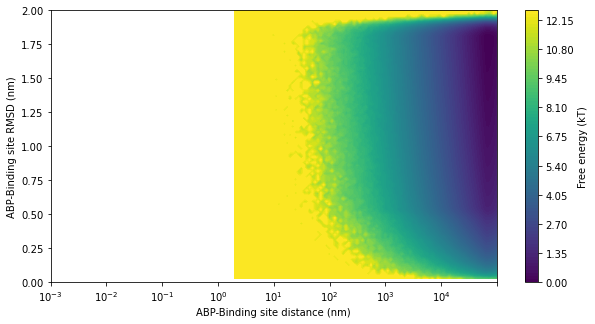

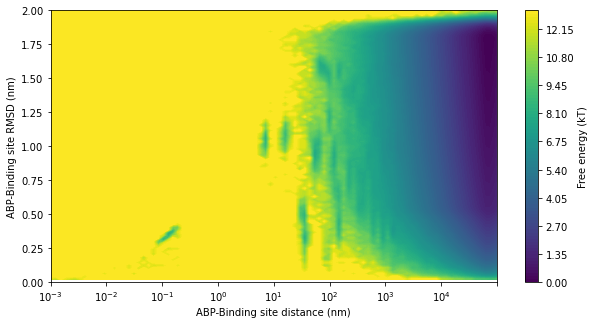

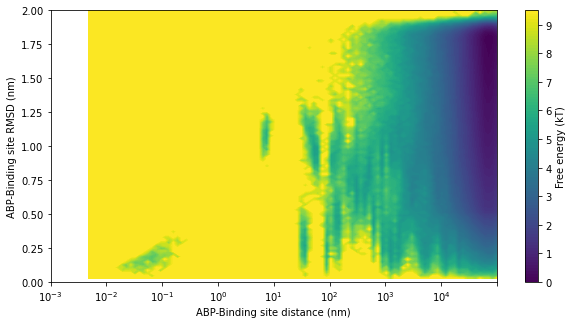

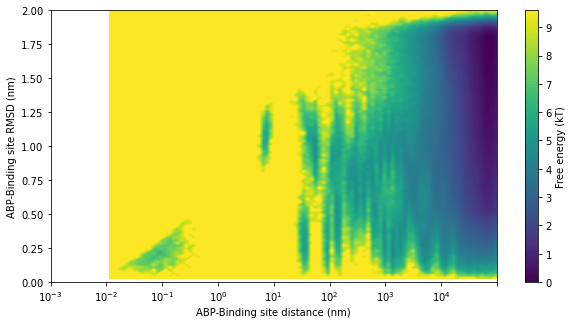

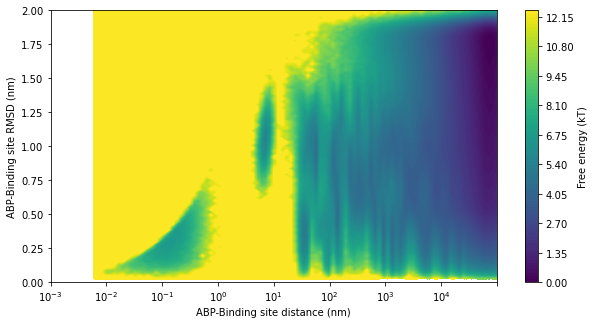

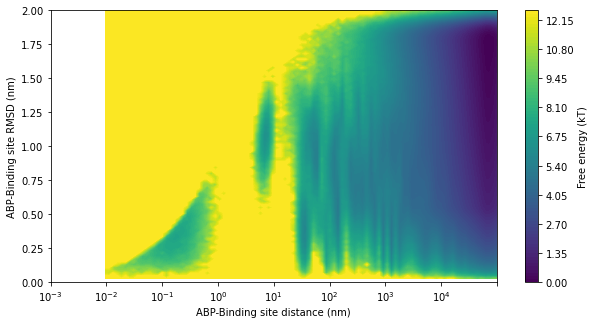

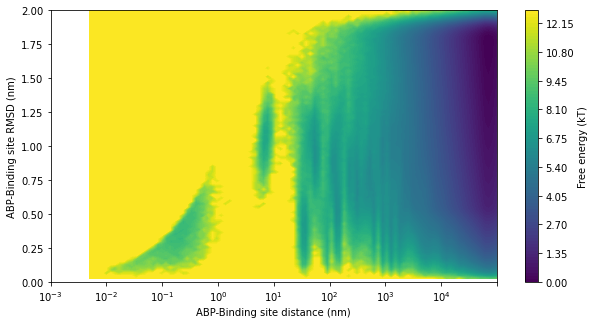

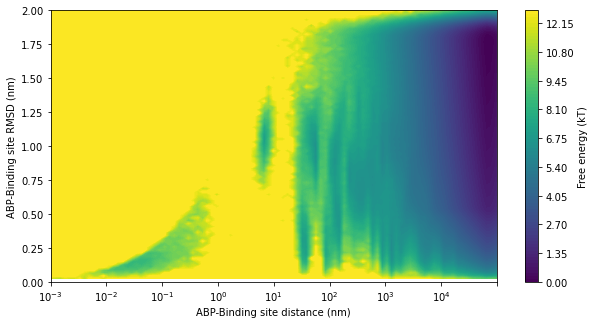

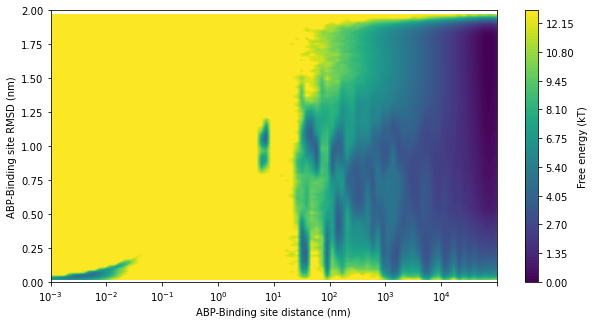

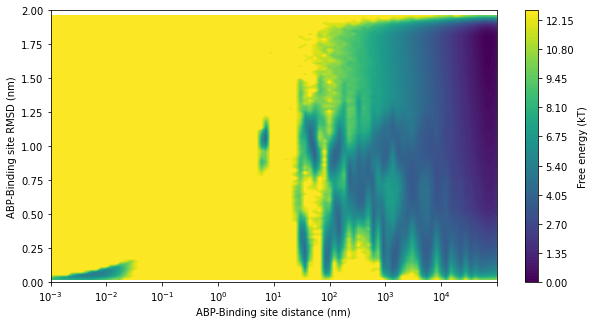

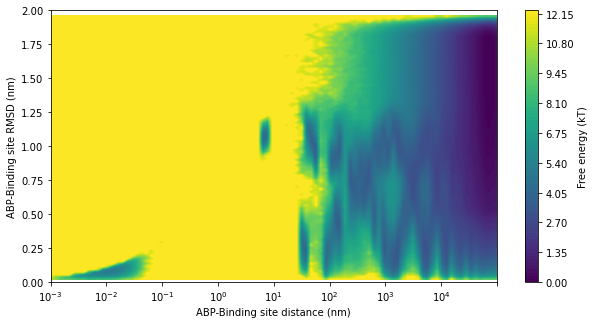

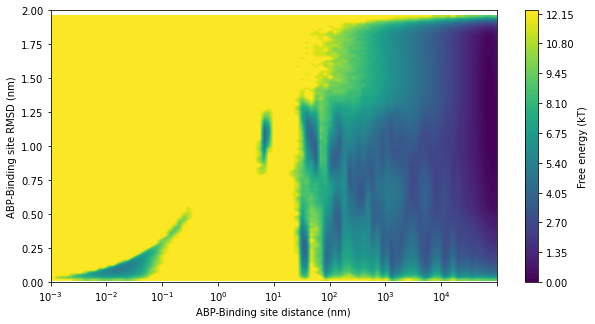

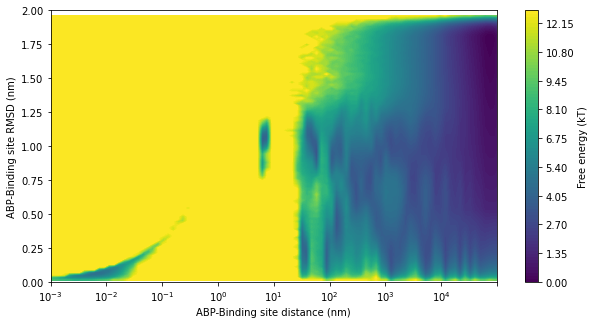

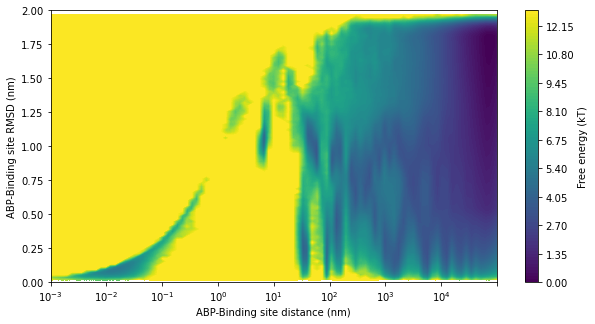

In [248]:
stride=5

for i,simulation in simulations.iterrows():
    selected_simulation=simulation

    root=selected_simulation['root']
    dcd=selected_simulation['dcd']
    cif=selected_simulation['cif']
    #!vmd -e ../Box_vis_500.vmd $cif $dcd


    try:
        cif=prody.parseMMCIF(selected_simulation['cif'])
    except KeyError:
        continue
    pdbx=mdtraj.formats.pdbx.load_pdbx(selected_simulation['cif'])
    dcd=mdtraj.load_dcd(selected_simulation['dcd'],top=pdbx)
    dcd.unitcell_vectors=np.array([[[500,0,0],[0,500,0],[0,0,500]]]*len(dcd))

    s={}
    for name in ['Aa','Ab','Ac','Ca','Cb','Cd']:
        selection=cif.select(f'name {name}')
        #dcd.setAtoms(selection)
        s.update({name:selection.getIndices()})
    #d1=np.array([sdist.cdist(a,b) for a,b in zip(s['Aa'],s['Ca'])])
    #d2=np.array([sdist.cdist(a,b) for a,b in zip(s['Ab'],s['Cb'])])
    #d3=np.array([sdist.cdist(a,b) for a,b in zip(s['Ac'],s['Cd'])])

    selection=cif.select('name Ca')

    d1=mdtraj.compute_distances(dcd[::stride],np.array([a for a in itertools.product(s['Aa'],s['Ca'])]),periodic=True)
    d2=mdtraj.compute_distances(dcd[::stride],np.array([a for a in itertools.product(s['Ab'],s['Cb'])]),periodic=True)
    d3=mdtraj.compute_distances(dcd[::stride],np.array([a for a in itertools.product(s['Ac'],s['Cd'])]),periodic=True)

    actin_com=(dcd[::stride].xyz[:,s['Aa']]+dcd[::stride].xyz[:,s['Ab']]+dcd[::stride].xyz[:,s['Ac']])/3
    abp_com=(dcd[::stride].xyz[:,s['Ca']]+dcd[::stride].xyz[:,s['Cb']]+dcd[::stride].xyz[:,s['Cd']])/3
    translation=np.expand_dims(abp_com,axis=1)-np.expand_dims(actin_com,axis=2)
    rmsd_abp=((((np.expand_dims(dcd[::stride].xyz[:,s['Ca']],axis=1)-translation-np.expand_dims(dcd[::stride].xyz[:,s['Aa']],axis=2))**2).sum(axis=3)+
               ((np.expand_dims(dcd[::stride].xyz[:,s['Cb']],axis=1)-translation-np.expand_dims(dcd[::stride].xyz[:,s['Ab']],axis=2))**2).sum(axis=3)+
               ((np.expand_dims(dcd[::stride].xyz[:,s['Cd']],axis=1)-translation-np.expand_dims(dcd[::stride].xyz[:,s['Ac']],axis=2))**2).sum(axis=3))/3)**.5
    rmsd_abp.shape

    dd=(d1**2+d2**2+d3**2)/3
    g1=-1*(np.exp(-dd/1.0)+np.exp(-dd/0.01*1.0))/2*(d1<12.0)
    g1.shape

    g2=g1.reshape(len(g1),len(s['Aa']),len(s['Ca']))
    g2.shape

    g3_total_bind = (g2<-0.2).sum(axis=1).T>0
    g3_partial_bind = (g2<0).sum(axis=1).T > 0
    g3_states=[g3_total_bind[:,0]]
    for t in range(1,len(g3_total_bind.T)):
        g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
        g3_states+=[g3_state]
    g3=np.array(g3_states).T
    Actin_binding=g3*1

    g3_total_bind = (g2<-0.2).sum(axis=2).T>0
    g3_partial_bind = (g2<0).sum(axis=2).T > 0
    g3_states=[g3_total_bind[:,0]]
    for t in range(1,len(g3_total_bind.T)):
        g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
        g3_states+=[g3_state]
    g3=np.array(g3_states).T
    ABP_binding=g3*1


    Actin_binding[0].sum()

    Actin_binding_pair=g2.argmin(axis=1).T
    ABP_binding_pair=g2.argmin(axis=2).T
    Actin_binding_pair[Actin_binding==0]=-99999
    ABP_binding_pair[ABP_binding==0]=-99999

    plt.figure(figsize=(10,5))
    try:
        fig,ax=pyemma.plots.plot_free_energy(np.log10((dd**.5).ravel()),rmsd_abp.ravel(),cmap='viridis')
    except ValueError:
        continue
    ax.set_xlim(-1.5,2.5)
    ax.set_ylim(0,2)
    ax.set_xticklabels([rf'$10^{{{i}}}$' for i in range(-3,5)])
    ax.set_xlabel('ABP-Binding site distance (nm)')
    ax.set_ylabel('ABP-Binding site RMSD (nm)')
    plt.savefig(f'{root}_Freeenergy.png')

In [241]:
dcd=selected_simulation['dcd']
cif=selected_simulation['cif']
!vmd -e ../Box_vis_500.vmd $cif $dcd

Info) VMD for LINUXAMD64, version 1.9.4a55 (October 19, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 12 CPUs, ISA dispatch enabled.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 12GB (18%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] NVIDIA GeForce RTX 3080 Ti 80 SM_8.6 1.7 GHz, 12GB RAM SP32 KT AE2 ZC
Info) OpenGL renderer: NVIDIA GeForce RTX 3080 Ti/PCIe/SSE2
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFGS) 
Info)   Full GLSL rendering mode is available.
Info)   Tex

@> 10480 atoms and 1 coordinate set(s) were parsed in 0.09s.


Text(0, 0.5, 'Energy')

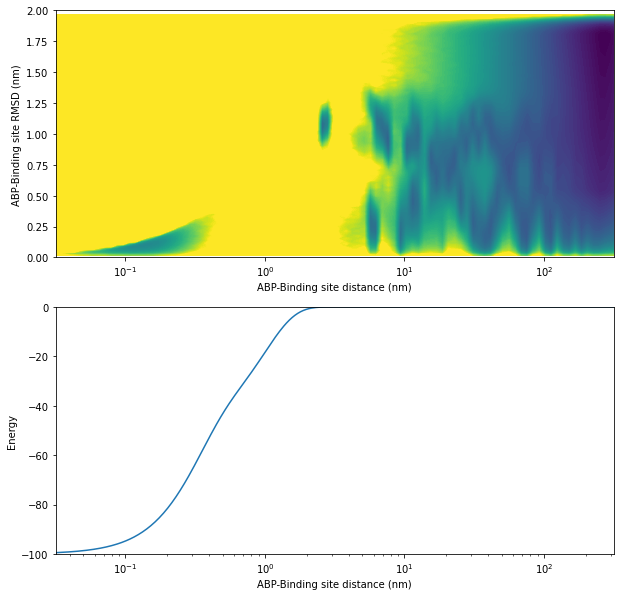

In [223]:
selected_simulation=simulations.loc[0]

root=selected_simulation['root']
dcd=selected_simulation['dcd']
cif=selected_simulation['cif']
#!vmd -e ../Box_vis_500.vmd $cif $dcd


cif=prody.parseMMCIF(selected_simulation['cif'])
pdbx=mdtraj.formats.pdbx.load_pdbx(selected_simulation['cif'])
dcd=mdtraj.load_dcd(selected_simulation['dcd'],top=pdbx)
dcd.unitcell_vectors=np.array([[[500,0,0],[0,500,0],[0,0,500]]]*len(dcd))

s={}
for name in ['Aa','Ab','Ac','Ca','Cb','Cd']:
    selection=cif.select(f'name {name}')
    #dcd.setAtoms(selection)
    s.update({name:selection.getIndices()})
#d1=np.array([sdist.cdist(a,b) for a,b in zip(s['Aa'],s['Ca'])])
#d2=np.array([sdist.cdist(a,b) for a,b in zip(s['Ab'],s['Cb'])])dd_temp
#d3=np.array([sdist.cdist(a,b) for a,b in zip(s['Ac'],s['Cd'])])

selection=cif.select('name Ca')

d1=mdtraj.compute_distances(dcd[::stride],np.array([a for a in itertools.product(s['Aa'],s['Ca'])]),periodic=True)
d2=mdtraj.compute_distances(dcd[::stride],np.array([a for a in itertools.product(s['Ab'],s['Cb'])]),periodic=True)
d3=mdtraj.compute_distances(dcd[::stride],np.array([a for a in itertools.product(s['Ac'],s['Cd'])]),periodic=True)

actin_com=(dcd[::stride].xyz[:,s['Aa']]+dcd[::stride].xyz[:,s['Ab']]+dcd[::stride].xyz[:,s['Ac']])/3
abp_com=(dcd[::stride].xyz[:,s['Ca']]+dcd[::stride].xyz[:,s['Cb']]+dcd[::stride].xyz[:,s['Cd']])/3
translation=np.expand_dims(abp_com,axis=1)-np.expand_dims(actin_com,axis=2)
rmsd_abp=((((np.expand_dims(dcd[::stride].xyz[:,s['Ca']],axis=1)-translation-np.expand_dims(dcd[::stride].xyz[:,s['Aa']],axis=2))**2).sum(axis=3)+
           ((np.expand_dims(dcd[::stride].xyz[:,s['Cb']],axis=1)-translation-np.expand_dims(dcd[::stride].xyz[:,s['Ab']],axis=2))**2).sum(axis=3)+
           ((np.expand_dims(dcd[::stride].xyz[:,s['Cd']],axis=1)-translation-np.expand_dims(dcd[::stride].xyz[:,s['Ac']],axis=2))**2).sum(axis=3))/3)**.5
rmsd_abp.shape

dd=(d1**2+d2**2+d3**2)/3
g1=-1*(np.exp(-dd/1.0)+np.exp(-dd/0.01*1.0))/2*(d1<12.0)
g1.shape

g2=g1.reshape(len(g1),len(s['Aa']),len(s['Ca']))
g2.shape

g3_total_bind = (g2<-0.2).sum(axis=1).T>0
g3_partial_bind = (g2<0).sum(axis=1).T > 0
g3_states=[g3_total_bind[:,0]]
for t in range(1,len(g3_total_bind.T)):
    g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
    g3_states+=[g3_state]
g3=np.array(g3_states).T
Actin_binding=g3*1

g3_total_bind = (g2<-0.2).sum(axis=2).T>0
g3_partial_bind = (g2<0).sum(axis=2).T > 0
g3_states=[g3_total_bind[:,0]]
for t in range(1,len(g3_total_bind.T)):
    g3_state=g3_total_bind[:,t] | (g3_states[-1] & g3_partial_bind[:,t])
    g3_states+=[g3_state]
g3=np.array(g3_states).T
ABP_binding=g3*1


Actin_binding[0].sum()

Actin_binding_pair=g2.argmin(axis=1).T
ABP_binding_pair=g2.argmin(axis=2).T
Actin_binding_pair[Actin_binding==0]=-99999
ABP_binding_pair[ABP_binding==0]=-99999

fig,(ax1,ax2)=plt.subplots(2,figsize=(10,10))
fig,ax=pyemma.plots.plot_free_energy(np.log10((dd**.5).ravel()),rmsd_abp.ravel(),cmap='viridis',
                                     ax=ax1,cbar=False,vmin=0,vmax=12)
#ax.set_xlim(-3,4)
ax1.set_xlim(-1.5,2.5)
ax1.set_ylim(0,2)
ax1.set_xticks(np.arange(-1,3))
ax1.set_xticklabels([rf'$10^{{{round(i,1)}}}$' for i in np.arange(-1,3)])
ax1.set_xlabel('ABP-Binding site distance (nm)')
ax1.set_ylabel('ABP-Binding site RMSD (nm)')
epsilon=float(selected_simulation['epsilon'])
w1=float(selected_simulation['w1'])
w2=float(selected_simulation['w1'])*float(selected_simulation['w2_ratio'])

x=np.logspace(-2,3,500)
y=-epsilon*(np.exp(-x**2/w1)+np.exp(-x**2/w2))/2*(x<120)
ax2.plot(x,y)
ax2.set_ylim(-epsilon,0)
ax2.set_xlim(10**-1.5,10**2.5)
ax2.semilogx()
ax2.set_xlabel('ABP-Binding site distance (nm)')
ax2.set_ylabel('Energy')

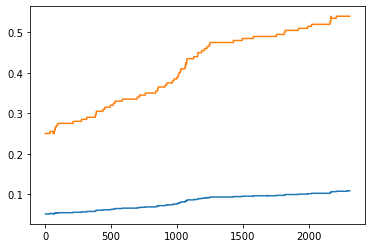

In [224]:
plt.plot(ABP_binding.sum(axis=0)/len(ABP_binding))
plt.plot(Actin_binding.sum(axis=0)/len(Actin_binding))

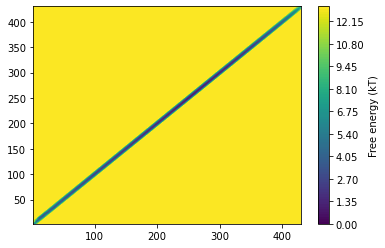

In [212]:
fig,ax=pyemma.plots.plot_free_energy((dd**.5).ravel(),d1.ravel(),cmap='viridis')

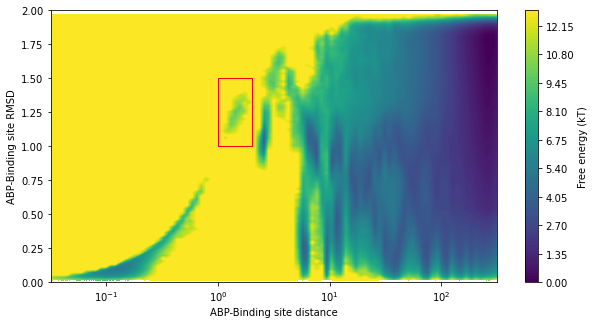

In [201]:
import matplotlib.patches as patches
plt.figure(figsize=(10,5))
fig,ax=pyemma.plots.plot_free_energy(np.log10((dd**.5).ravel()),rmsd_abp.ravel(),cmap='viridis')
ax.set_xlim(-1.5,2.5)
ax.set_ylim(0,2)
ax.set_xticks(np.arange(-1,3))
ax.set_xticklabels([rf'$10^{{{round(i,1)}}}$' for i in np.arange(-1,3)])
ax.set_xlabel('ABP-Binding site distance')
ax.set_ylabel('ABP-Binding site RMSD')
dd_lims=(1,2) #Square1
rmsd_lims=(1,1.5) #Square1
#dd_lims=(2,4) #Square2
#rmsd_lims=(0.7,1.75) #Square2

rect = patches.Rectangle((np.log10(dd_lims[0]), rmsd_lims[0]), 
                         np.log10(dd_lims[1])-np.log10(dd_lims[0]), 
                         rmsd_lims[1]-rmsd_lims[0], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

<AxesSubplot:>

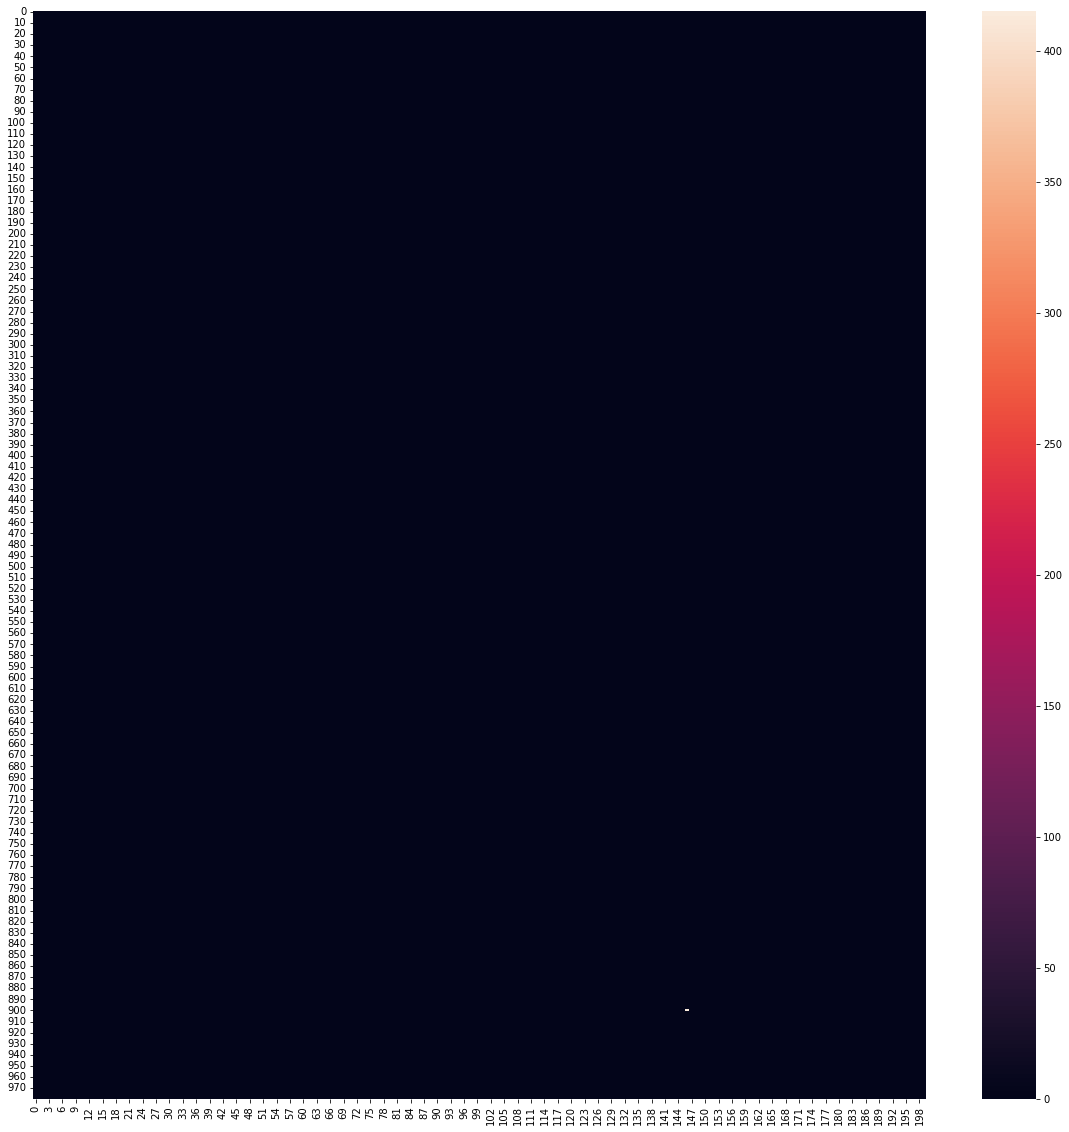

In [202]:
dd_temp=(dd**.5).reshape(rmsd_abp.shape)
selection=((dd_temp>=dd_lims[0]) & (dd_temp<=dd_lims[1]) & (rmsd_abp>=rmsd_lims[0]) & (rmsd_abp<=rmsd_lims[1])).reshape(rmsd_abp.shape)
plt.figure(figsize=(20,20))
sns.heatmap(selection.sum(axis=0))

In [203]:
selection.sum(),selection.sum(axis=0).max()

(415, 415)

(900, 146)
890


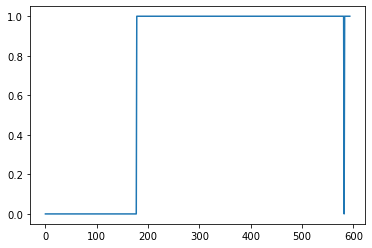

In [204]:
example_binding=np.unravel_index(selection.sum(axis=0).argmax(),selection.shape[1:])
print(example_binding)
plt.plot(selection[:,example_binding[0],example_binding[1]])
print(selection[:,example_binding[0],example_binding[1]].argmax()*5)

In [205]:
print(s['Aa'][example_binding[0]],s['Ab'][example_binding[0]],s['Ac'][example_binding[0]],
      s['Ca'][example_binding[1]],s['Cb'][example_binding[1]],s['Cd'][example_binding[1]])


9083 9084 9085 10318 10319 10320


In [207]:
dcd=selected_simulation['dcd']
cif=selected_simulation['cif']
!vmd -e ../Box_vis_500.vmd $cif $dcd

Info) VMD for LINUXAMD64, version 1.9.4a55 (October 19, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 12 CPUs, ISA dispatch enabled.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 42GB (66%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] NVIDIA GeForce RTX 3080 Ti 80 SM_8.6 1.7 GHz, 12GB RAM SP32 KT AE2 ZC
Info) OpenGL renderer: NVIDIA GeForce RTX 3080 Ti/PCIe/SSE2
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFGS) 
Info)   Full GLSL rendering mode is available.
Info)   Tex

In [275]:
#Stay time
#Kon ->per ABP site/per ABP
#Koff
#1D Diffusion


g1.shape

(705, 196000)

In [276]:
g1.sum(axis=0).argmin()

97883

In [277]:
d1.max(),d1.min()

(432.53467, 0.04042675)

(-1.0, 0.0)

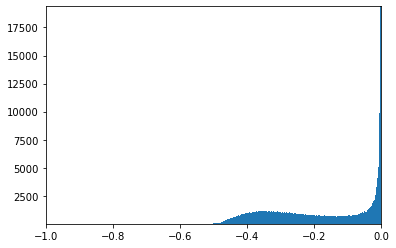

In [550]:
import matplotlib.pyplot as plt
%matplotlib inline
h=plt.hist(g1.ravel(),bins=500)
#plt.semilogy()
plt.ylim(1,h[0][:-1].max())
plt.xlim(-1,0)

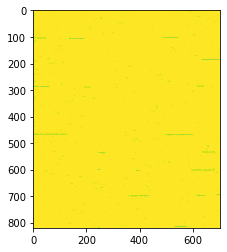

In [126]:
plt.imshow(g1[:,g1.sum(axis=0)<0].T)

In [25]:
import pyemma
pyemma.__version__

'2.4'

In [157]:
temp=g1[:,g1.sum(axis=0)<0].T<0
temp=temp.astype(int)
for lag in range(1,20):
    msm=pyemma.msm.estimate_markov_model(temp.tolist(),lag=lag)
    print(msm.transition_matrix)

[[0.99748292 0.00251708]
 [0.73532338 0.26467662]]
[[0.99736444 0.00263556]
 [0.78198108 0.21801892]]
[[0.99735022 0.00264978]
 [0.79720976 0.20279024]]
[[0.99730454 0.00269546]
 [0.8159601  0.1840399 ]]
[[0.99728145 0.00271855]
 [0.82875686 0.17124314]]
[[0.99728456 0.00271544]
 [0.83416583 0.16583417]]
[[0.99725963 0.00274037]
 [0.84792396 0.15207604]]
[[0.99729608 0.00270392]
 [0.8432649  0.1567351 ]]
[[0.99724999 0.00275001]
 [0.85914787 0.14085213]]
[[0.99728302 0.00271698]
 [0.85283777 0.14716223]]
[[0.99725795 0.00274205]
 [0.86260694 0.13739306]]
[[0.9972434 0.0027566]
 [0.8698941 0.1301059]]
[[0.99722174 0.00277826]
 [0.87670541 0.12329459]]
[[0.9972372  0.0027628 ]
 [0.87348178 0.12651822]]
[[0.9972527  0.0027473 ]
 [0.87031408 0.12968592]]
[[0.99722029 0.00277971]
 [0.88235294 0.11764706]]
[[0.99722336 0.00277664]
 [0.88268156 0.11731844]]
[[0.99718369 0.00281631]
 [0.89730554 0.10269446]]
[[0.99721347 0.00278653]
 [0.89013225 0.10986775]]


In [99]:
np.asscalar(g1)

/home/cb/miniconda3/envs/openmm_dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


ValueError: can only convert an array of size 1 to a Python scalar

In [94]:
np.random.choice(g1[:1000].ravel(),100)

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0.], dtype=float32)

In [95]:
np.array([[[1,0,0],[0,1,0],[0,0,1]]]*len(dcd)).shape

(38, 3, 3)

In [13]:
dcd.unitcell_distances.

(15829,)